In [1]:
%pip install matplotlib pandas seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_csv("amazon.csv")

In [4]:
df.head(10)

,date,open,high,low,close,adj_close,volume
0,2012-05-21 00:00:00-04:00,10.7015,10.9990,10.6410,10.9055,10.9055,71596000
1,2012-05-22 00:00:00-04:00,10.9155,10.9435,10.6980,10.7665,10.7665,74662000
2,2012-05-23 00:00:00-04:00,10.7355,10.8775,10.5590,10.8640,10.8640,84876000
3,2012-05-24 00:00:00-04:00,10.8490,10.8830,10.6350,10.7620,10.7620,62822000
4,2012-05-25 00:00:00-04:00,10.7495,10.7990,10.6110,10.6445,10.6445,43428000
5,2012-05-29 00:00:00-04:00,10.7150,10.8275,10.6145,10.7375,10.7375,53878000
6,2012-05-30 00:00:00-04:00,10.6070,10.6490,10.3875,10.4615,10.4615,81564000
7,2012-05-31 00:00:00-04:00,10.4740,10.6895,10.3555,10.6455,10.6455,98880000
8,2012-06-01 00:00:00-04:00,10.4220,10.5615,10.3650,10.4110,10.4110,79030000
9,2012-06-04 00:00:00-04:00,10.3700,10.7675,10.3185,10.7285,10.7285,85992000


Primeiras 5 linhas:
                              open     high     low    close  adj_close  \
date                                                                      
2012-05-21 00:00:00-04:00  10.7015  10.9990  10.641  10.9055    10.9055   
2012-05-22 00:00:00-04:00  10.9155  10.9435  10.698  10.7665    10.7665   
2012-05-23 00:00:00-04:00  10.7355  10.8775  10.559  10.8640    10.8640   
2012-05-24 00:00:00-04:00  10.8490  10.8830  10.635  10.7620    10.7620   
2012-05-25 00:00:00-04:00  10.7495  10.7990  10.611  10.6445    10.6445   

                             volume  
date                                 
2012-05-21 00:00:00-04:00  71596000  
2012-05-22 00:00:00-04:00  74662000  
2012-05-23 00:00:00-04:00  84876000  
2012-05-24 00:00:00-04:00  62822000  
2012-05-25 00:00:00-04:00  43428000  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3238 entries, 2012-05-21 00:00:00-04:00 to 2025-04-04 00:00:00-04:00
Data columns (total 6 columns):
 #   Column     N

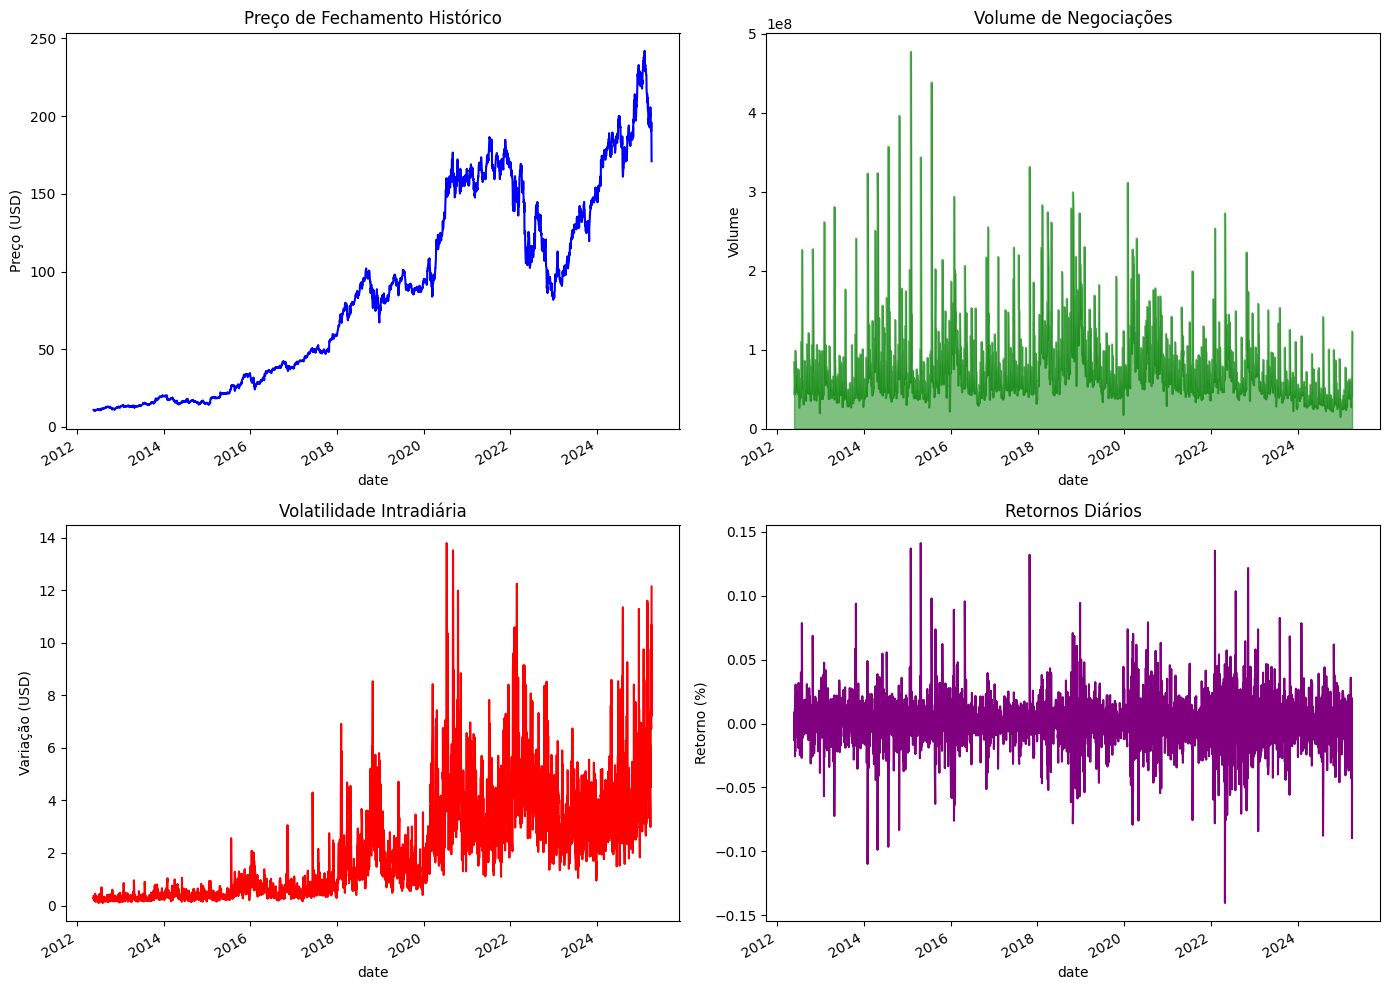

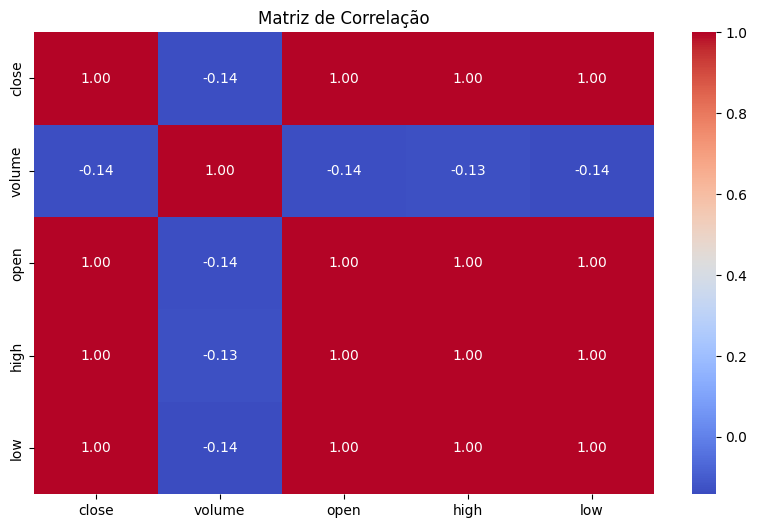

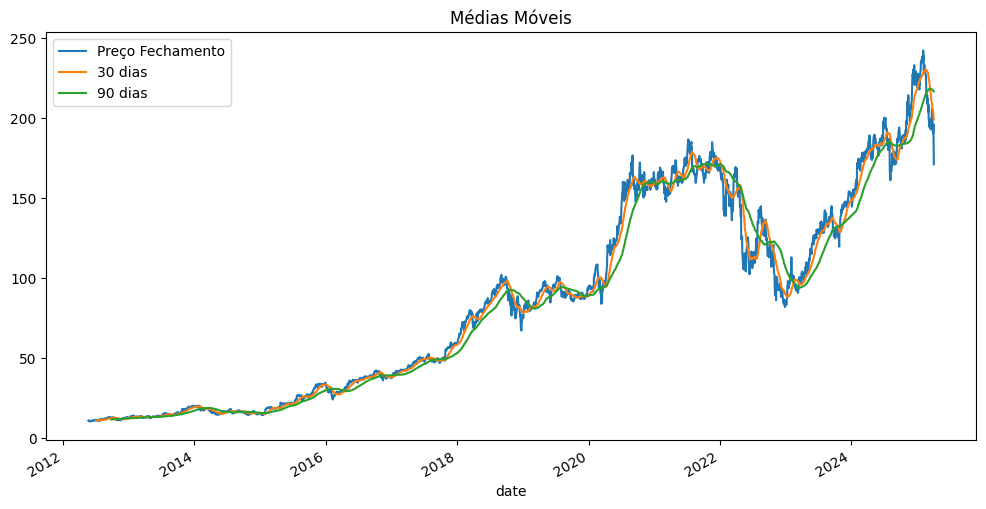


Estatísticas de Volume:
count    3.238000e+03
mean     7.410096e+07
std      4.055279e+07
min      1.500750e+07
25%      4.913950e+07
50%      6.332500e+07
75%      8.659328e+07
max      4.771220e+08
Name: volume, dtype: float64


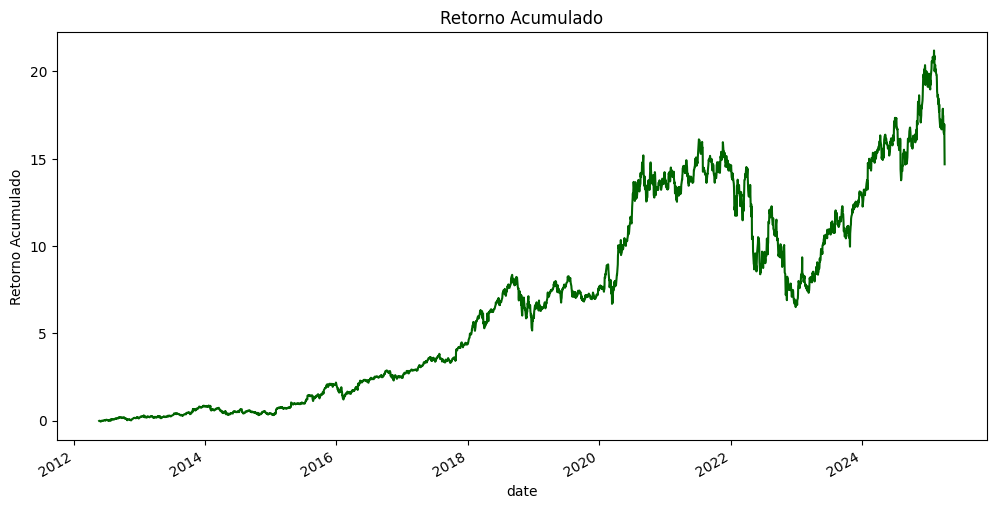

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados
df = pd.read_csv('amazon.csv', parse_dates=['date'], index_col='date')

# 2. Verificar dados básicos
print("Primeiras 5 linhas:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# 3. Pré-processamento (se necessário)
# Verificar valores faltantes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())

# 4. Análise Gráfica
plt.figure(figsize=(14, 10))

# Preço de Fechamento
plt.subplot(2, 2, 1)
df['close'].plot(title='Preço de Fechamento Histórico', color='blue')
plt.ylabel('Preço (USD)')

# Volume
plt.subplot(2, 2, 2)
df['volume'].plot(kind='area', title='Volume de Negociações', alpha=0.5, color='green')
plt.ylabel('Volume')

# Volatilidade Diária
plt.subplot(2, 2, 3)
(df['high'] - df['low']).plot(title='Volatilidade Intradiária', color='red')
plt.ylabel('Variação (USD)')

# Retornos Diários
plt.subplot(2, 2, 4)
df['close'].pct_change().plot(title='Retornos Diários', color='purple')
plt.ylabel('Retorno (%)')

plt.tight_layout()
plt.show()

# 5. Análise de Correlação
corr = df[['close', 'volume', 'open', 'high', 'low']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# 6. Médias Móveis
df['30_day_MA'] = df['close'].rolling(window=30).mean()
df['90_day_MA'] = df['close'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
df['close'].plot(title='Médias Móveis', label='Preço Fechamento')
df['30_day_MA'].plot(label='30 dias')
df['90_day_MA'].plot(label='90 dias')
plt.legend()
plt.show()

# 7. Análise de Volume
volume_stats = df['volume'].describe()
print("\nEstatísticas de Volume:")
print(volume_stats)

# 8. Retorno Acumulado
df['cumulative_return'] = (1 + df['close'].pct_change()).cumprod() - 1

plt.figure(figsize=(12, 6))
df['cumulative_return'].plot(title='Retorno Acumulado', color='darkgreen')
plt.ylabel('Retorno Acumulado')
plt.show()